### Importing the Libraries

In [2]:
import tensorflow as tf
# Import ImageDataGenerator from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

### Part 1 - Data Preprocessing

In [3]:
# Generating images for the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

### Creating the Training set

In [4]:
training_set = train_datagen.flow_from_directory(
    r'D:/ASL/Sign-Language-To-Text-Conversion-main/Sign-Language-To-Text-Conversion-main/dataSet/trainingData',
    target_size=(128, 128),
    batch_size=10,
    color_mode='grayscale',
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    r'D:/ASL/Sign-Language-To-Text-Conversion-main/Sign-Language-To-Text-Conversion-main/dataSet/testingData',
    target_size=(128, 128),
    batch_size=10,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 12845 images belonging to 27 classes.
Found 4270 images belonging to 27 classes.


In [5]:
# training_set = train_datagen.flow_from_directory(
#     'D:/ASL/Sign-Language-To-Text-Conversion-main/Sign-Language-To-Text-Conversion-main/dataSet/trainingData',                                
#     target_size=(128, 128),
#     batch_size=10,
#     color_mode='grayscale',                                
#     class_mode='categorical',
#     classes=['d', 'r', 'u']  # Specify the classes to include
# )

# # Load the testing set with specific classes
# test_set = test_datagen.flow_from_directory(
#     'D:/ASL/Sign-Language-To-Text-Conversion-main/Sign-Language-To-Text-Conversion-main/dataSet/testingData',
#     target_size=(128, 128),                                  
#     batch_size=10,        
#     color_mode='grayscale',
#     class_mode='categorical',
#     classes=['d', 'r', 'u']  # Specify the classes to include
# )

### Part 2 - Building the CNN

In [6]:
# Import necessary modules
from tensorflow.keras import layers, models

# Define the Sequential model
classifier = models.Sequential()

# Define the Input layer
classifier.add(layers.Input(shape=(128, 128, 1)))

# Add the first Convolutional layer
classifier.add(layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

# Add the first MaxPooling layer
classifier.add(layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Add the second Convolutional layer
classifier.add(layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

# Add the second MaxPooling layer
classifier.add(layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Flatten the outputs for fully connected layers
classifier.add(layers.Flatten())

# Add the first Dense layer
classifier.add(layers.Dense(units=128, activation='relu'))

# Add a Dropout layer to reduce overfitting
classifier.add(layers.Dropout(0.40))

# Add the second Dense layer
classifier.add(layers.Dense(units=96, activation='relu'))

# Add another Dropout layer
classifier.add(layers.Dropout(0.40))

# Add the third Dense layer
classifier.add(layers.Dense(units=64, activation='relu'))

# Add the output Dense layer
classifier.add(layers.Dense(units=27, activation='softmax'))

# Display the model summary
classifier.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 96)                  │          12,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 27)                  │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,224,347 (16.11 MB)

 Trainable params: 4,224,347 (16.11 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

### Part 3 - Training the CNN

In [8]:
history = classifier.fit(
    training_set,
    epochs=5,
    validation_data=test_set
)

C:\Users\HP VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.1220 - loss: 3.0042

C:\Users\HP VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1285/1285 ━━━━━━━━━━━━━━━━━━━━ 349s 268ms/step - accuracy: 0.1221 - loss: 3.0037 - val_accuracy: 0.8937 - val_loss: 0.3856
Epoch 2/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 130s 101ms/step - accuracy: 0.7139 - loss: 0.8303 - val_accuracy: 0.9707 - val_loss: 0.0974
Epoch 3/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 130s 101ms/step - accuracy: 0.8398 - loss: 0.4722 - val_accuracy: 0.9836 - val_loss: 0.0650
Epoch 4/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 162s 126ms/step - accuracy: 0.8857 - loss: 0.3404 - val_accuracy: 0.9967 - val_loss: 0.0202
Epoch 5/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 224s 143ms/step - accuracy: 0.9131 - loss: 0.2645 - val_accuracy: 0.9948 - val_loss: 0.0176


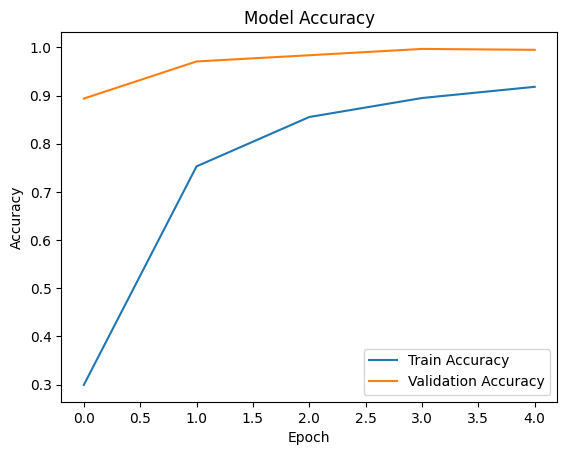

In [9]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

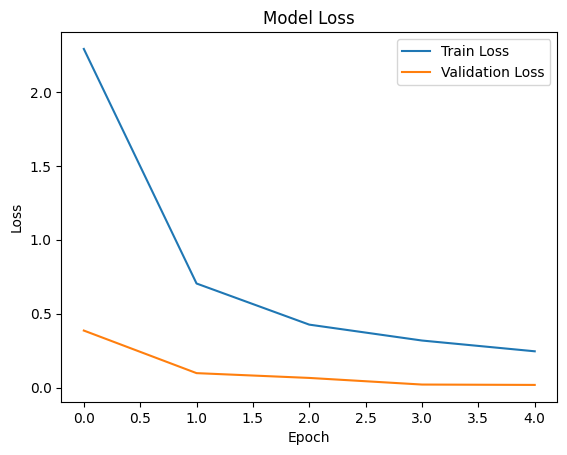

In [10]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

### Part 4 - Testing

In [11]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Load and preprocess the image
image_path = "D:/ASL/Sign-Language-To-Text-Conversion-main/Sign-Language-To-Text-Conversion-main/dataSet/testingData/A/135.jpg"
image = load_img(image_path, target_size=(128, 128), color_mode='grayscale')  # Load image
image_array = img_to_array(image)  # Convert image to array
image_array = image_array / 255.0  # Normalize pixel values
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension


In [12]:
# Make prediction
prediction = classifier.predict(image_array)
predicted_class = np.argmax(prediction, axis=1)  # Get the index of the highest probability
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
Predicted Class: [1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


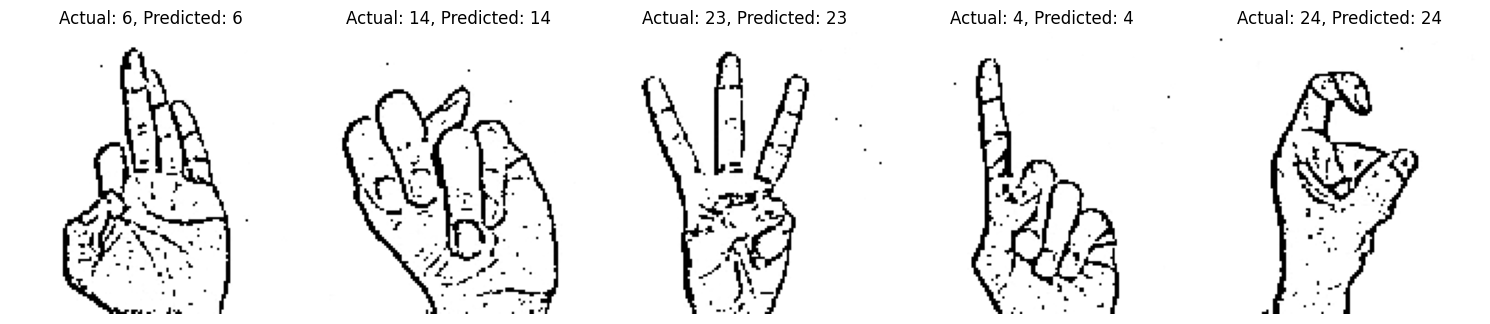

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
images, labels = next(test_set)

# Make predictions
predictions = classifier.predict(images)

# Number of images to display in the grid
num_images = 5
# Set up the grid dimensions (e.g., 1 row, 5 columns)
grid_rows = 1
grid_cols = num_images

# Create subplots
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 5))

# Flatten the axes to loop over them easily
axes = axes.flatten()

# Plot images with predicted and actual labels in grid format
for i in range(num_images):
    axes[i].imshow(images[i].reshape(128, 128), cmap='gray')
    axes[i].set_title(f"Actual: {np.argmax(labels[i])}, Predicted: {np.argmax(predictions[i])}")
    axes[i].axis('off')  # Hide axes

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#### Saving the Model

In [13]:
# Save model architecture to JSON
model_json = classifier.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
print('Model architecture saved to model_new.json')

# Save model weights to H5 file
classifier.save_weights('model_new.weights.h5')
print('Model weights saved to model_new.h5')


Model architecture saved to model_new.json
Model weights saved to model_new.h5
